In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [4]:
query="""SELECT * FROM reg_house.todo_loc2
"""
df=pd.read_sql_query(query, engine)
df.head()

,house_id,date,nber_bedrooms,nber_bathrooms,sqft_living,sqft_lot,floors,waterfront,view_,condition_,...,sqft_basement,yr_built,yr_renovated,zipcode,lati,longi,sqft_living15,sqft_lot15,price,location
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,0
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,0
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,0
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,0
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,0


In [5]:
df.columns

Index(['house_id', 'date', 'nber_bedrooms', 'nber_bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_', 'condition_', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lati', 'longi', 'sqft_living15', 'sqft_lot15', 'price', 'location'],
      dtype='object')

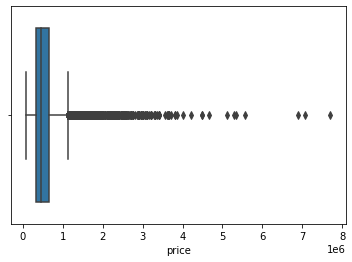

In [6]:
sns.boxplot(df["price"])

In [7]:
iqr = np.percentile(df["price"],75) - np.percentile(df["price"],25)
upper_limit = np.percentile(df["price"],75) + 1.5*iqr
lower_limit = np.percentile(df["price"],25) - 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
print("The lower wisker is at: %4.2f" % lower_limit)
outliers_upper = df[df["price"] > upper_limit].index.tolist()
outliers_lower = df[lower_limit > df["price"]].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers_upper))
print("The number of points outside the lower wisker is: ",len(outliers_lower))

The upper wisker is at: 1129500.00
The lower wisker is at: -162500.00
The number of points outside the upper wisker is:  1158
The number of points outside the lower wisker is:  0


for i in range(len(df)):
    if df.loc[i, "yr_built"]>2000:
        df.loc[i, "yr_built"]='A'
    elif df.loc[i, "yr_built"]<=2000 and df.loc[i, "yr_built"]>1985:
        df.loc[i, "yr_built"]='B'
    elif df.loc[i, "yr_built"]<=1985 and df.loc[i, "yr_built"]>1970:
        df.loc[i, "yr_built"]='C'
    elif df.loc[i, "yr_built"]<=1970 and df.loc[i, "yr_built"]>1955:
        df.loc[i, "yr_built"]='D'
    elif df.loc[i, "yr_built"]<=1955 and df.loc[i, "yr_built"]>1940:
        df.loc[i, "yr_built"]='E'
    elif df.loc[i, "yr_built"]<=1940 and df.loc[i, "yr_built"]>1925:
        df.loc[i, "yr_built"]='F'
    elif df.loc[i, "yr_built"]<=1925 and df.loc[i, "yr_built"]>1910:
        df.loc[i, "yr_built"]='G'
    else:
        df.loc[i, "yr_built"]='H'

for i in range(len(df)):
    if df.loc[i, "yr_renovated"]>0:
        df.loc[i, "yr_renovated"]='Yes'
    else:
        df.loc[i, "yr_renovated"]='No'

for i in range(len(df)):
    if df.loc[i, "sqft_basement"]>0:
        df.loc[i, "sqft_basement"]='Yes'
    else:
        df.loc[i, "sqft_basement"]='No'

In [8]:
df.head()

,house_id,date,nber_bedrooms,nber_bathrooms,sqft_living,sqft_lot,floors,waterfront,view_,condition_,...,sqft_basement,yr_built,yr_renovated,zipcode,lati,longi,sqft_living15,sqft_lot15,price,location
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,0
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,0
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,0
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,0
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,0


In [9]:
df=df.drop(["house_id","date"],axis=1)

In [10]:
df.head()

,nber_bedrooms,nber_bathrooms,sqft_living,sqft_lot,floors,waterfront,view_,condition_,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lati,longi,sqft_living15,sqft_lot15,price,location
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,0
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,0


In order to separate the model in 2 different models I will only be taking the "low price houses" which I will be filtering by taking out the outliers in prices

query="""SELECT * FROM reg_house.price_data
WHERE price<= 1129500
"""
lp=pd.read_sql_query(query, engine)
lp.head()

sns.boxplot(lp["price"])

lp=lp.drop(["house_id","date"],axis=1)

lp.head()

df=df.drop(["lati","longi"],axis=1)

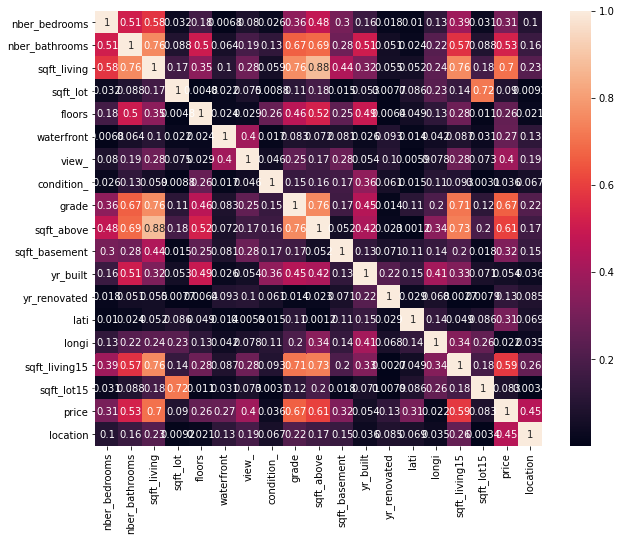

In [11]:
corr_matrix = abs(df.corr())
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [12]:
y=df["price"]
x=df.drop(["price"],axis=1)

# Categorical Data

In [13]:
#x["zipcode"]=x["zipcode"].astype(object)
#x["waterfront"]=x["waterfront"].astype(object)
#x["view_"]=x["view_"].astype(object)
#x["location"]=x["location"].astype(object)
#x.info()

In [14]:
x_cat=x.select_dtypes("object")
x_cat.head()

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074


In [15]:
x_cat=pd.get_dummies(x_cat)
x_cat.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Numericals

In [16]:
x_num=x.select_dtypes("number")
x_num.head()

,nber_bedrooms,nber_bathrooms,sqft_living,sqft_lot,floors,waterfront,view_,condition_,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15,location
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,0


In [17]:
#Discrete vs. Continuous variables
def discrete_continuous(x):
    cols = list(x)
    list_continuous = []
    list_discrete = []

    for i in cols:
        if x_num[i].nunique()>20:
            list_continuous.append(i)
        else:
            list_discrete.append(i)
            
    print("list continuous :",list_continuous)
    print("list discrete :",list_discrete)

In [18]:
discrete_continuous(x_num)

list continuous : ['nber_bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lati', 'longi', 'sqft_living15', 'sqft_lot15']
list discrete : ['nber_bedrooms', 'floors', 'waterfront', 'view_', 'condition_', 'grade', 'location']


In [19]:
list_continuous=['nber_bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lati', 'longi', 'sqft_living15', 'sqft_lot15']
list_discrete=['nber_bedrooms', 'floors', 'waterfront', 'view_', 'condition_', 'grade', 'location']

In [20]:
x_cont=x_num[list_continuous]
x_disc=x_num[list_discrete]

In [21]:
x_cont.head()

,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15
0,1.00,1180,5650,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,2.25,2570,7242,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,1.00,770,10000,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,3.00,1960,5000,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,2.00,1680,8080,1680.0,0,1987,0,47.6168,-122.045,1800,7503


In [22]:
#Normalising
from sklearn.preprocessing import Normalizer
# normalising data
transformer=Normalizer().fit(x_cont)
x_normalized=transformer.transform(x_cont)
x_normalized=pd.DataFrame(x_normalized)
x_normalized.columns=x_cont.columns
x_normalized.head()

,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15
0,0.000118,0.138809,0.664639,0.138809,0.000000,0.229977,0.000000,0.005589,-0.014382,0.157631,0.664639
1,0.000195,0.222916,0.628154,0.188221,0.034695,0.169225,0.172695,0.004139,-0.010610,0.146586,0.662588
2,0.000075,0.057822,0.750938,0.057822,0.000000,0.145156,0.000000,0.003585,-0.009179,0.204255,0.605407
3,0.000383,0.249930,0.637575,0.133891,0.116039,0.250567,0.000000,0.006060,-0.015607,0.173420,0.637575
4,0.000172,0.144897,0.696884,0.144897,0.000000,0.171375,0.000000,0.004107,-0.010526,0.155247,0.647119


In [23]:
x_disc.head()

,nber_bedrooms,floors,waterfront,view_,condition_,grade,location
0,3,1.0,0,0,3,7,0
1,3,2.0,0,0,3,7,0
2,2,1.0,0,0,3,6,0
3,4,1.0,0,0,5,7,0
4,3,1.0,0,0,3,8,0


for i in list(x_cont.columns):
    sns.distplot(x_cont[i])
    plt.show()

#Log transformation
for i in list_continuous:
    fig,axes=plt.subplots(1,2)
    sns.boxplot(x_cont[i], ax=axes[0])
    sns.boxplot(np.log(abs(x_cont[i]+1)), ax=axes[1])

for i in list_continuous:
    fig,axes=plt.subplots(1,2)
    sns.boxplot(x_cont[i], ax=axes[0])
    sns.boxplot(np.log(abs(x_cont[i]+1)), ax=axes[1])

for i in list_continuous:
    log_x = list(map(np.log, abs(x_cont[i]+1)))
    print(i)
    sns.distplot(log_x)
    plt.show()

In [24]:
x_cont.columns

Index(['nber_bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lati', 'longi',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
x_cont.head()

,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15
0,1.00,1180,5650,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,2.25,2570,7242,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,1.00,770,10000,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,3.00,1960,5000,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,2.00,1680,8080,1680.0,0,1987,0,47.6168,-122.045,1800,7503


for i in list_continuous:
    x_cont[i] = list(map(np.log, abs(x_cont[i]+1)))

In [26]:
x_cont.head()

,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15
0,1.00,1180,5650,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,2.25,2570,7242,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,1.00,770,10000,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,3.00,1960,5000,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,2.00,1680,8080,1680.0,0,1987,0,47.6168,-122.045,1800,7503


# Transformed DataFrame

In [27]:
X=pd.concat([x_cat,x_disc,x_normalized],axis=1)

In [28]:
X.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0.138809,0.664639,0.138809,0.000000,0.229977,0.000000,0.005589,-0.014382,0.157631,0.664639
1,0,0,0,0,0,0,0,0,0,0,...,0.222916,0.628154,0.188221,0.034695,0.169225,0.172695,0.004139,-0.010610,0.146586,0.662588
2,0,0,0,0,0,0,0,0,0,0,...,0.057822,0.750938,0.057822,0.000000,0.145156,0.000000,0.003585,-0.009179,0.204255,0.605407
3,0,0,0,0,0,0,0,0,0,0,...,0.249930,0.637575,0.133891,0.116039,0.250567,0.000000,0.006060,-0.015607,0.173420,0.637575
4,0,0,0,0,0,0,0,0,0,0,...,0.144897,0.696884,0.144897,0.000000,0.171375,0.000000,0.004107,-0.010526,0.155247,0.647119


In [29]:
X=X.drop(["location","sqft_living15"],axis=1)

In [30]:
#Normalising
from sklearn.preprocessing import StandardScaler
# normalising data
transformer=StandardScaler().fit(X)
x_stan=transformer.transform(X)
x_stan=pd.DataFrame(x_stan)
x_stan.columns=X.columns
x_stan.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15
0,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.576699,-0.430632,0.181962,-0.199280,-0.644356,0.338737,-0.185285,0.356048,-0.359114,0.346089
1,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.037901,0.410191,-0.110397,0.346788,0.248328,-0.189160,4.178801,-0.170192,0.174003,0.328512
2,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.872363,-1.240274,0.873491,-1.094312,-0.644356,-0.398303,-0.185285,-0.371421,0.376209,-0.161700
3,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,1.264438,0.680254,-0.034899,-0.253639,2.341257,0.517655,-0.185285,0.526877,-0.532279,0.114079
4,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.195413,-0.369776,0.440351,-0.132006,-0.644356,-0.170479,-0.185285,-0.181933,0.185805,0.195898


In [31]:
#KNN Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.2, random_state=100)

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 90924.84
The mean squared error of the model in the test set is: 37648159927.36
The root mean squared error of the model in the test set is: 194031.34
The R2 of the model in the test set is: 0.74


In [32]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

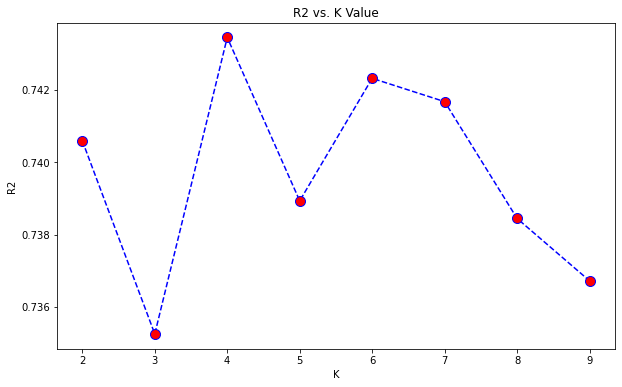

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [34]:
#Linear Model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.2, random_state=100)

lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)
lm_predictions = lm_model.predict(X_test)

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 103182.81
The mean squared error of the model in the test set is: 38420044729.08
The root mean squared error of the model in the test set is: 196010.32
The R2 of the model in the test set is: 0.74


In [35]:
#GBR Model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.2, random_state=100)

gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(X_train,y_train)
gbr_predictions = gbr_model.predict(X_test)

MAE = mean_absolute_error(y_test,gbr_predictions)
MSE = mean_squared_error(y_test,gbr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,gbr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 106433.13
The mean squared error of the model in the test set is: 30994949720.61
The root mean squared error of the model in the test set is: 176053.83
The R2 of the model in the test set is: 0.79


# Train_Test DataFrame

In [36]:
df_train= X_train
df_train.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15
5018,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.730056,0.980685,-0.784181,1.360883,-0.644356,0.469403,-0.185285,0.445937,-0.437549,-0.010447
14837,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.841640,1.423599,-0.039600,1.850510,-0.644356,0.471651,6.325080,0.554552,-0.551891,-1.490587
13634,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.743821,0.937311,-0.592248,0.768958,0.622097,0.479990,-0.185285,0.449539,-0.451663,0.133876
2952,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-1.066656,-1.381358,2.275169,-1.358254,-0.392967,-1.366650,-0.185285,-1.375481,1.377654,-2.177681
7972,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.420811,-0.171636,0.512813,-0.587867,0.926899,-0.698619,-0.185285,-0.704032,0.706971,0.301401


In [37]:
df_train["y_train"]=y_train

In [38]:
df_train.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15,y_train
5018,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.980685,-0.784181,1.360883,-0.644356,0.469403,-0.185285,0.445937,-0.437549,-0.010447,540000
14837,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,1.423599,-0.039600,1.850510,-0.644356,0.471651,6.325080,0.554552,-0.551891,-1.490587,865000
13634,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.937311,-0.592248,0.768958,0.622097,0.479990,-0.185285,0.449539,-0.451663,0.133876,450000
2952,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-1.381358,2.275169,-1.358254,-0.392967,-1.366650,-0.185285,-1.375481,1.377654,-2.177681,590000
7972,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.171636,0.512813,-0.587867,0.926899,-0.698619,-0.185285,-0.704032,0.706971,0.301401,590000


In [39]:
df_test= X_test
df_test.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15
7189,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.503288,-0.229131,0.506087,0.023473,-0.644356,0.517059,-0.185285,0.544485,-0.542713,-0.516071
2751,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.930924,0.910886,-0.481327,1.283722,-0.644356,0.673041,-0.185285,0.627472,-0.633946,-0.363535
17077,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.737648,-1.006059,0.344798,-0.835395,-0.644356,-0.059592,-0.185285,-0.036142,0.039788,0.520301
15151,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.188405,0.112196,0.112166,0.400798,-0.644356,-0.074240,-0.185285,-0.094945,0.098554,0.275322
985,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.105674,-0.147201,0.239198,-0.380326,0.506603,-0.301207,-0.185285,-0.328229,0.320200,0.407324


In [40]:
df_test["y_test"]=y_test
df_test.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15,y_test
7189,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.229131,0.506087,0.023473,-0.644356,0.517059,-0.185285,0.544485,-0.542713,-0.516071,900000
2751,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.910886,-0.481327,1.283722,-0.644356,0.673041,-0.185285,0.627472,-0.633946,-0.363535,346950
17077,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-1.006059,0.344798,-0.835395,-0.644356,-0.059592,-0.185285,-0.036142,0.039788,0.520301,305000
15151,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.112196,0.112166,0.400798,-0.644356,-0.074240,-0.185285,-0.094945,0.098554,0.275322,507000
985,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.147201,0.239198,-0.380326,0.506603,-0.301207,-0.185285,-0.328229,0.320200,0.407324,283000


# Predicting outliers in train set

In [41]:
iqr = np.percentile(df_train["y_train"],75) - np.percentile(df_train["y_train"],25)
upper_limit = np.percentile(df_train["y_train"],75) + 1.5*iqr
lower_limit = np.percentile(df_train["y_train"],25) - 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
print("The lower wisker is at: %4.2f" % lower_limit)
outliers_upper =df_train[df_train["y_train"] > upper_limit].index.tolist()
outliers_lower = df_train[lower_limit > df_train["y_train"]].index.tolist()
print("The number of points outside the upper wisker is: ",len(outliers_upper))
print("The number of points outside the lower wisker is: ",len(outliers_lower))

The upper wisker is at: 1135825.00
The lower wisker is at: -162375.00
The number of points outside the upper wisker is:  911
The number of points outside the lower wisker is:  0


In [42]:
df_out_train=df_train

In [43]:
df_out_train = df_out_train.drop(df_out_train[df_out_train.y_train <= upper_limit].index)

In [85]:
y_out_train=df_out_train["y_train"]
x_out_train=df_out_train.drop("y_train",axis=1)

In [87]:
x_out_train.head()

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,nber_bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lati,longi,sqft_lot15
6227,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.256989,1.176946,-0.955432,0.505441,1.852341,-0.789489,-0.185285,-0.809230,0.810496,0.998831
20418,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.617977,1.721199,-0.815338,2.179496,-0.644356,-0.211938,-0.185285,-0.243545,0.247454,-0.484726
11674,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,1.179481,2.525539,-1.187292,2.050060,1.727098,1.069133,-0.185285,1.172938,-1.172420,-1.118818
19821,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,...,0.463646,0.974412,1.304923,1.353949,-0.644356,-0.490052,-0.185285,-0.518042,0.521022,-1.884380
17927,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,6.509030,-0.081065,-0.115229,-0.068204,-0.095453,...,-0.193129,0.026380,-0.097418,-0.399291,0.997497,-0.740559,-0.185285,-0.754797,0.755574,0.687246


In [88]:
y_out_train.head()

6227     2200000
20418    1140000
11674    1550000
19821    1260000
17927    1320000
Name: y_train, dtype: int64

### Predicting y_train_out

In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_out_train, y_out_train, test_size=0.2, random_state=100)

Text(0, 0.5, 'R2')

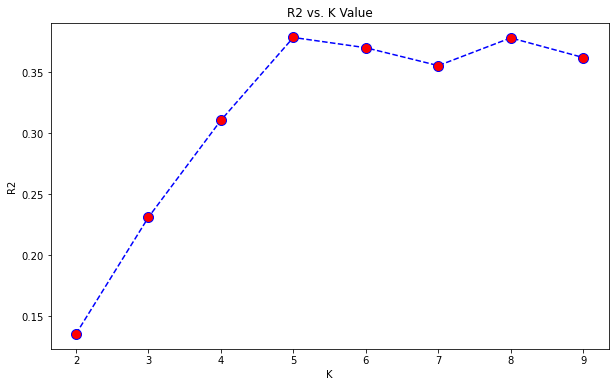

In [46]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x1_train, y1_train)
    scores.append(model.score(x1_test, y1_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [80]:
knn_model = KNeighborsRegressor(n_neighbors=5) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(x1_train, y1_train)
predictions = knn_model.predict(x1_test)

MAE = mean_absolute_error(y1_test,predictions)
MSE = mean_squared_error(y1_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 345803.28
The mean squared error of the model in the test set is: 376811300546.45
The root mean squared error of the model in the test set is: 613849.57
The R2 of the model in the test set is: 0.38


In [57]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(x1_train,y1_train)
predictions = lm_model.predict(x1_test)

MAE = mean_absolute_error(y1_test,predictions)
MSE = mean_squared_error(y1_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 52480528800794.20
The mean squared error of the model in the test set is: 504019674214704414572192727040.00
The root mean squared error of the model in the test set is: 709943430291952.50
The R2 of the model in the test set is: -831198680689315072.00


In [58]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x1_train,y1_train)
predictions = gbr_model.predict(x1_test)

MAE = mean_absolute_error(y1_test,predictions)
MSE = mean_squared_error(y1_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1_test,gbr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 323062.80
The mean squared error of the model in the test set is: 297811898040.55
The root mean squared error of the model in the test set is: 545721.45
The R2 of the model in the test set is: 0.50


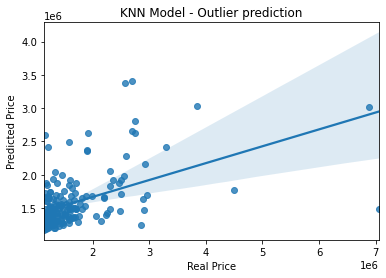

In [82]:
sns.regplot(x=y1_test, y=knn_predictions)
plt.title('KNN Model - Outlier prediction')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.show()

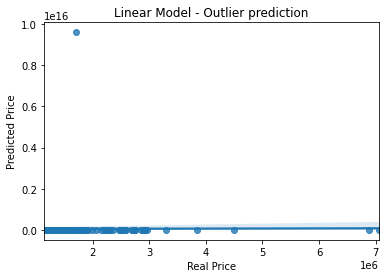

In [83]:
sns.regplot(x=y1_test, y=lm_predictions)
plt.title('Linear Model - Outlier prediction')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.show()

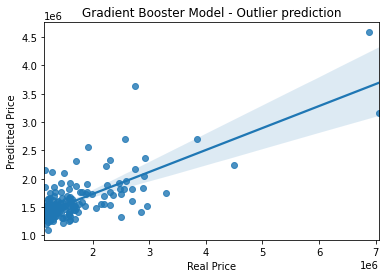

In [84]:
sns.regplot(x=y1_test, y=gbr_predictions)
plt.title('Gradient Booster Model - Outlier prediction')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.show()

In [51]:
estimators = [('KNN', KNeighborsRegressor(n_neighbors=3)),
              ('Linear', linear_model.LinearRegression()),
              ('Gradient Boosting', GradientBoostingRegressor())]

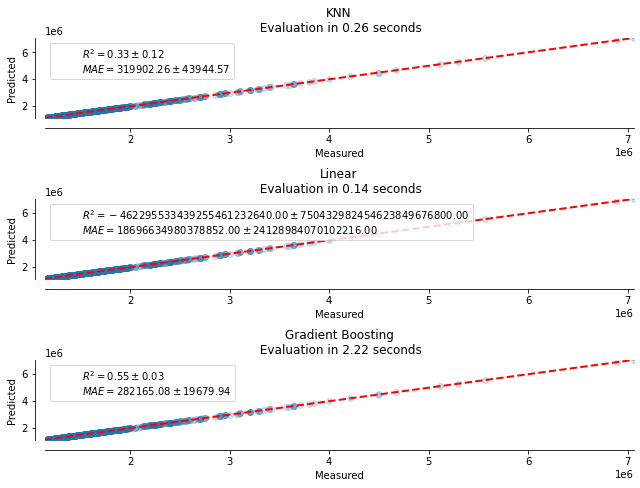

In [70]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y1_test, predictions, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y1_test.min(), y1_test.max()],
            [y1_test.min(), y1_test.max()],
            '--r', linewidth=2)
    ax.scatter(y1_test, y1_test, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y1_test.min(), y1_test.max()])
    ax.set_ylim([y1_test.min(), y1_test.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(3, 1, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    score = cross_validate(est, x_out_train, y_out_train,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    predictions = cross_val_predict(est, x_out_train, y_out_train, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y_out_train, predictions,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [53]:
gbr_predictions

array([1815083.93109385, 1404086.99839119, 1364171.7710126 ,
       1409320.93521629, 1563911.49389697, 1263200.3998372 ,
       1342625.28320369, 1687997.16816699, 1493159.0135303 ,
       1368686.40879317, 1575856.60309699, 1379027.00051023,
       1325965.46959015, 1538914.07112579, 1688717.62744943,
       1496632.29195578, 1247334.62804972, 1452115.35648623,
       1215478.46581182, 1472383.79056326, 1751182.82084592,
       1882737.40746779, 2350521.4641945 , 1493495.64442604,
       2113038.73604441, 1441563.59652017, 1705496.21745763,
       1810203.58143086, 1468716.44779348, 1402537.24353199,
       1322860.24075821, 1692257.45251677, 1578846.6104333 ,
       1586160.91199312, 1367335.95064775, 1642138.50062684,
       1419468.9222175 , 1718284.00203611, 1279517.08042977,
       1349213.19128201, 2021746.947382  , 1185551.19449695,
       2362125.9026989 , 1594390.7357678 , 2119506.81625786,
       1244881.57324087, 1413202.47957497, 1452841.30491548,
       1545171.24637138,

In [54]:
predictions=gbr_predictions

In [55]:
df_out_new=x1_test
df_out_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,nber_bedrooms,nber_bathrooms,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
19513,1,0,1,0,0,0,0,1,0,1,...,4,4.00,2.0,3,10,8.380457,9.399472,8.380457,7.687539,9.287394
19965,1,0,1,0,0,0,0,0,1,1,...,4,3.25,2.0,3,9,8.111028,9.105091,7.962416,7.844241,8.756210
2834,1,0,1,0,0,0,0,0,1,1,...,3,3.25,2.0,3,9,8.143517,8.314097,7.848153,8.042699,8.314097
2464,1,0,0,0,0,0,1,0,1,0,...,4,2.50,1.5,3,9,8.058644,8.438366,7.611348,7.934155,8.577159
884,1,0,1,0,0,0,0,0,1,0,...,5,2.50,1.0,3,7,8.071219,9.752955,7.678326,8.316545,9.663516


In [56]:
df_out_new["y"]=y1_test
df_out_new["predictions"]=predictions

In [57]:
df_out_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,y,predictions
19513,1,0,1,0,0,0,0,1,0,1,...,2.0,3,10,8.380457,9.399472,8.380457,7.687539,9.287394,1980000,1.815084e+06
19965,1,0,1,0,0,0,0,0,1,1,...,2.0,3,9,8.111028,9.105091,7.962416,7.844241,8.756210,1210000,1.404087e+06
2834,1,0,1,0,0,0,0,0,1,1,...,2.0,3,9,8.143517,8.314097,7.848153,8.042699,8.314097,1320000,1.364172e+06
2464,1,0,0,0,0,0,1,0,1,0,...,1.5,3,9,8.058644,8.438366,7.611348,7.934155,8.577159,1280000,1.409321e+06
884,1,0,1,0,0,0,0,0,1,0,...,1.0,3,7,8.071219,9.752955,7.678326,8.316545,9.663516,1270000,1.563911e+06


In [58]:
df_out_new.shape

(183, 101)

### Predicting normal in train set

In [59]:
df_normal_train=df_train

In [60]:
df_normal_train = df_normal_train.drop(df_normal_train[df_normal_train.y_train > upper_limit].index)

In [61]:
y_normal_train=df_normal_train["y_train"]
x_normal_train=df_normal_train.drop("y_train",axis=1)

In [62]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x_normal_train, y_normal_train, test_size=0.2, random_state=100)

In [63]:
knn_model = KNeighborsRegressor(n_neighbors=9) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(x2_train, y2_train)
knn_predictions = knn_model.predict(x2_test)

MAE = mean_absolute_error(y2_test,knn_predictions)
MSE = mean_squared_error(y2_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y2_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 71519.29
The mean squared error of the model in the test set is: 10221718641.15
The root mean squared error of the model in the test set is: 101102.52
The R2 of the model in the test set is: 0.76


Text(0, 0.5, 'R2')

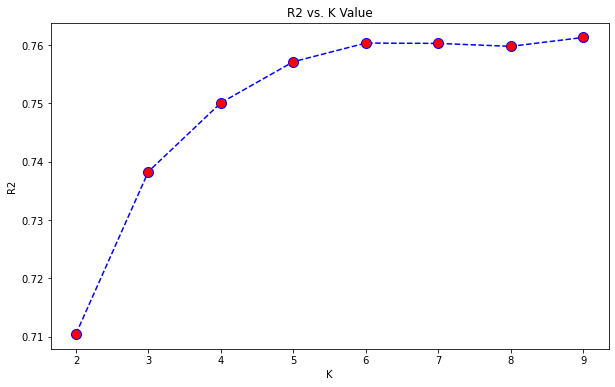

In [64]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x2_train, y2_train)
    scores.append(model.score(x2_test, y2_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [65]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(x2_train,y2_train)
lm_predictions = lm_model.predict(x2_test)

MAE = mean_absolute_error(y2_test,lm_predictions)
MSE = mean_squared_error(y2_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y2_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 62730.15
The mean squared error of the model in the test set is: 7097944215.90
The root mean squared error of the model in the test set is: 84249.30
The R2 of the model in the test set is: 0.83


In [66]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x2_train,y2_train)
gbr_predictions = gbr_model.predict(x2_test)

MAE = mean_absolute_error(y2_test,gbr_predictions)
MSE = mean_squared_error(y2_test,gbr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y2_test,gbr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 80033.43
The mean squared error of the model in the test set is: 10574176020.74
The root mean squared error of the model in the test set is: 102830.81
The R2 of the model in the test set is: 0.75


In [67]:
lm_predictions

array([ 93696., 526912., 385408., ..., 746688., 731328., 533376.])

In [68]:
predictions=lm_predictions

In [69]:
df_normal_new=x2_test
df_normal_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,nber_bedrooms,nber_bathrooms,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
704,1,0,1,0,0,0,0,1,0,0,...,2,1.00,1.0,3,5,6.781058,9.105091,6.781058,7.252054,9.210440
9452,1,0,1,0,0,0,0,1,0,1,...,3,2.25,2.0,3,8,7.484930,8.206856,7.484930,7.479300,8.207947
12385,1,0,1,0,0,0,0,0,1,0,...,3,2.00,1.0,4,7,7.403061,8.900276,6.928538,7.664347,8.503905
14567,1,0,1,0,0,0,0,1,0,0,...,2,1.00,1.0,3,4,6.867974,8.853808,6.867974,7.523481,9.002209
4328,1,0,1,0,0,0,0,1,0,0,...,2,1.00,1.0,3,6,7.021976,12.291337,7.021976,7.300473,12.291337


In [70]:
df_normal_new["y"]=y2_test
df_normal_new["predictions"]=predictions

In [71]:
df_normal_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,y,predictions
704,1,0,1,0,0,0,0,1,0,0,...,1.0,3,5,6.781058,9.105091,6.781058,7.252054,9.210440,130000,93696.0
9452,1,0,1,0,0,0,0,1,0,1,...,2.0,3,8,7.484930,8.206856,7.484930,7.479300,8.207947,499000,526912.0
12385,1,0,1,0,0,0,0,0,1,0,...,1.0,4,7,7.403061,8.900276,6.928538,7.664347,8.503905,560000,385408.0
14567,1,0,1,0,0,0,0,1,0,0,...,1.0,3,4,6.867974,8.853808,6.867974,7.523481,9.002209,95000,63680.0
4328,1,0,1,0,0,0,0,1,0,0,...,1.0,3,6,7.021976,12.291337,7.021976,7.300473,12.291337,290000,268992.0


# Predicting Test Set

In [72]:
df_test.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,nber_bathrooms,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,y_test
7189,1,0,1,0,0,0,0,1,0,0,...,1.00,1.0,3,7,7.123673,8.612685,7.123673,7.640604,8.389587,900000
2751,1,0,1,0,0,0,0,1,0,1,...,2.50,2.0,4,8,7.621195,8.377701,7.621195,7.775276,8.377701,346950
17077,1,0,1,0,0,0,0,1,0,0,...,1.00,1.0,3,6,6.758095,8.888895,6.758095,7.147559,8.888895,305000
15151,1,0,1,0,0,0,0,1,0,1,...,2.50,2.0,3,8,7.659643,8.882114,7.659643,7.565793,8.882808,507000
985,1,0,1,0,0,0,0,0,1,0,...,2.75,1.0,3,7,7.664347,9.054972,7.353082,7.664347,9.054972,283000


In [73]:
y=df_test["y_test"]
x=df_test.drop(["y_test"],axis=1)

In [74]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [75]:
knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(x3_train, y3_train)
knn_predictions = knn_model.predict(x3_test)

MAE = mean_absolute_error(y3_test,knn_predictions)
MSE = mean_squared_error(y3_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y3_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 110758.03
The mean squared error of the model in the test set is: 34449123305.46
The root mean squared error of the model in the test set is: 185604.75
The R2 of the model in the test set is: 0.76


Text(0, 0.5, 'R2')

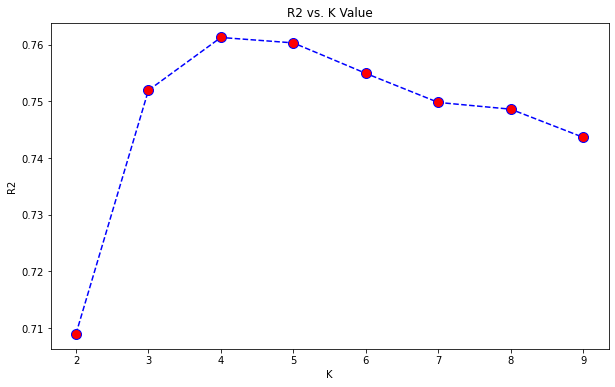

In [76]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x3_train, y3_train)
    scores.append(model.score(x3_test, y3_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [77]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(x3_train,y3_train)
lm_predictions = lm_model.predict(x3_test)

MAE = mean_absolute_error(y3_test,lm_predictions)
MSE = mean_squared_error(y3_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y3_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 108180.94
The mean squared error of the model in the test set is: 31462119473.24
The root mean squared error of the model in the test set is: 177375.65
The R2 of the model in the test set is: 0.78


In [78]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x3_train,y3_train)
gbr_predictions = gbr_model.predict(x3_test)

MAE = mean_absolute_error(y3_test,gbr_predictions)
MSE = mean_squared_error(y3_test,gbr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y3_test,gbr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 105897.82
The mean squared error of the model in the test set is: 30869674241.31
The root mean squared error of the model in the test set is: 175697.68
The R2 of the model in the test set is: 0.79


In [79]:
predictions=gbr_predictions

In [80]:
df_test_new=x3_test
df_test_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,nber_bedrooms,nber_bathrooms,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
13294,1,0,1,0,0,0,0,1,0,0,...,3,2.00,1.0,3,7,7.286876,8.651025,7.286876,7.244942,8.651025
19419,1,0,1,0,0,0,0,1,0,0,...,6,3.50,2.0,3,9,8.250881,11.139337,8.250881,7.787797,11.139337
19027,1,0,1,0,0,0,0,0,1,0,...,3,2.00,1.0,4,7,7.473637,8.768574,6.888572,7.473637,8.700348
9841,1,0,1,0,0,0,0,0,1,0,...,4,2.25,1.0,4,8,7.962416,9.035272,7.300473,7.983099,9.195328
8197,1,0,1,0,0,0,0,1,0,0,...,3,2.25,2.0,3,7,7.384610,8.880168,7.384610,7.403061,8.881142


In [81]:
df_test_new["y"]=y3_test
df_test_new["predictions"]=predictions

In [82]:
df_test_new.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,y,predictions
13294,1,0,1,0,0,0,0,1,0,0,...,1.0,3,7,7.286876,8.651025,7.286876,7.244942,8.651025,340000,386271.725336
19419,1,0,1,0,0,0,0,1,0,0,...,2.0,3,9,8.250881,11.139337,8.250881,7.787797,11.139337,710000,807972.529673
19027,1,0,1,0,0,0,0,0,1,0,...,1.0,4,7,7.473637,8.768574,6.888572,7.473637,8.700348,690000,556130.163889
9841,1,0,1,0,0,0,0,0,1,0,...,1.0,4,8,7.962416,9.035272,7.300473,7.983099,9.195328,890000,893222.608950
8197,1,0,1,0,0,0,0,1,0,0,...,2.0,3,7,7.384610,8.880168,7.384610,7.403061,8.881142,269950,275464.903630


# Metrics

## Normal

In [99]:
df_predictions=pd.concat([df_normal_new,df_out_new],axis=0)

In [100]:
df_predictions.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,y,predictions
704,1,0,1,0,0,0,0,1,0,0,...,1.0,3,5,6.781058,9.105091,6.781058,7.252054,9.210440,130000,93696.0
9452,1,0,1,0,0,0,0,1,0,1,...,2.0,3,8,7.484930,8.206856,7.484930,7.479300,8.207947,499000,526912.0
12385,1,0,1,0,0,0,0,0,1,0,...,1.0,4,7,7.403061,8.900276,6.928538,7.664347,8.503905,560000,385408.0
14567,1,0,1,0,0,0,0,1,0,0,...,1.0,3,4,6.867974,8.853808,6.867974,7.523481,9.002209,95000,63680.0
4328,1,0,1,0,0,0,0,1,0,0,...,1.0,3,6,7.021976,12.291337,7.021976,7.300473,12.291337,290000,268992.0


In [101]:
x_train=df_predictions.drop("y",axis=1)
x_train.head()

,waterfront_0,waterfront_1,view__0,view__1,view__2,view__3,view__4,sqft_basement_No,sqft_basement_Yes,yr_built_A,...,nber_bathrooms,floors,condition_,grade,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,predictions
704,1,0,1,0,0,0,0,1,0,0,...,1.00,1.0,3,5,6.781058,9.105091,6.781058,7.252054,9.210440,93696.0
9452,1,0,1,0,0,0,0,1,0,1,...,2.25,2.0,3,8,7.484930,8.206856,7.484930,7.479300,8.207947,526912.0
12385,1,0,1,0,0,0,0,0,1,0,...,2.00,1.0,4,7,7.403061,8.900276,6.928538,7.664347,8.503905,385408.0
14567,1,0,1,0,0,0,0,1,0,0,...,1.00,1.0,3,4,6.867974,8.853808,6.867974,7.523481,9.002209,63680.0
4328,1,0,1,0,0,0,0,1,0,0,...,1.00,1.0,3,6,7.021976,12.291337,7.021976,7.300473,12.291337,268992.0


In [86]:
x_train["predictions"] = list(map(np.log, abs(x_train["predictions"]+1)))

In [102]:
y_train=df_predictions["predictions"]

In [103]:
y_test=df_test_new["y"]
x_test=df_test_new.drop("y",axis=1)

In [89]:
x_test["predictions"] = list(map(np.log, abs(x_test["predictions"]+1)))

In [106]:
knn_model = KNeighborsRegressor(n_neighbors=9) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 104607.11
The mean squared error of the model in the test set is: 25747628597.45
The root mean squared error of the model in the test set is: 160460.68
The R2 of the model in the test set is: 0.82


Text(0, 0.5, 'R2')

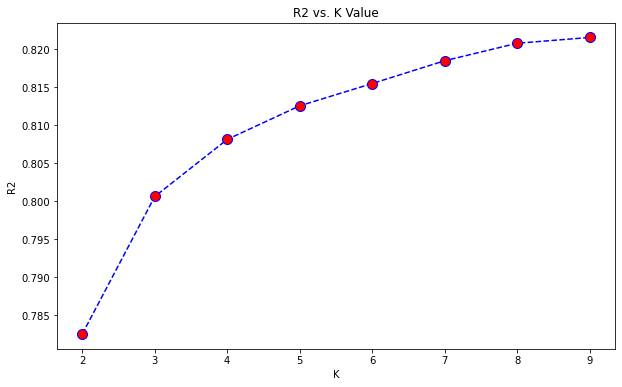

In [105]:
#Best K?
scores = []
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

In [107]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(x_train,y_train)
lm_predictions = lm_model.predict(x_test)

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 105897.82
The mean squared error of the model in the test set is: 30869674241.31
The root mean squared error of the model in the test set is: 175697.68
The R2 of the model in the test set is: 0.79


In [108]:
gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x_train,y_train)
gbr_predictions = gbr_model.predict(x_test)

MAE = mean_absolute_error(y_test,gbr_predictions)
MSE = mean_squared_error(y_test,gbr_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,gbr_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 104947.26
The mean squared error of the model in the test set is: 27402008164.58
The root mean squared error of the model in the test set is: 165535.52
The R2 of the model in the test set is: 0.81
